## <font color = '#0f0264'> <center> Referat laborator 06 </center></font>

Modificati titlul fisierului păstrând formatul acestuia, cu datele dvs:
- numar grupa
- nume
- prenume

Rulati codurile indicate in celulele de mai jos;
- codul din prima celula reprezinta implementarea functiei care este utilizata pentru afisarea caracteristicii de functionare a stabilizatorului de tensiune;
- codul din a 2a celula reprezinta implementarea functiei care este utilizata pentru afisarea formelor de unda ale tensiunilor electrice, specifice sursei de tensiune continua.

In [1]:
import matplotlib.pyplot as plt
import numpy as np

def draw_op_characteristic(wfi, wfo, title):
    '''
    functia afiseaza intr-un grid 2 linii x 1 coloana
    variatiile in timp (formele de unda) ale marimilor 
    wf1 si wf2;
      wf1, wf2       = marimile pentru care se afiseaza formele de unda
      title1, title2 = "etichetele" marimilor electrice afisate 
    '''
    vi = np.array(wfi)
    vo = np.array(wfo)   

    fig = plt.figure(figsize = (12,6))
    plt.title(title)
    plt.xlabel('Vin [Volts]')
    plt.ylabel('Vout [Volts]')
    plt.grid('on', linewidth = 0.25, linestyle = '--', color = 'green')
    plt.plot( vi, vo, color = 'blue')

In [2]:
import matplotlib.pyplot as plt
import numpy as np

def draw_waveforms(wf1, wf2, wf3, wf4, 
                   title1 = 'Tensiune priza energie electrica: vI(t)', 
                   title2 = 'Tensiune iesire transformator: vT(t)',
                   title3 = 'Tensiune iesire redresor cu filtru capacitiv: vR(t)',
                   title4 = 'Tensiune iesire sursa de tensiune continua: vO(t)'
                  ):
    '''
    functia afiseaza intr-un grid 2 linii x 2 coloane
    variatiile in timp (formele de unda) ale marimilor 
    wf1, wf2, wf3, wf4;
      
    title1, ..., title4 = "semnificatie" marimi electrice afisate; 
                           sunt initializate cu valori predefinite
                           (nu mai trebuie furnizate alte valori)
    '''
    wfs    = (wf1, wf2, wf3, wf4)
    titles = (title1, title2, title3, title4)
    colors = ['black', 'green', 'red', 'blue']

    fig, axs = plt.subplots(nrows = 4, ncols = 1, figsize = (12,12))
    
    for i,ax in enumerate(axs):
        ax.set_title(titles[i])
        ax.set_xlabel(f'Time[{wfs[i].abscissa.unit}]')
        ax.set_ylabel(f'Voltage[{wfs[i].unit}]')
        ax.grid('on', linewidth = 0.25, linestyle = '--', color = 'green')
        ax.plot( np.array(wfs[i].abscissa),  np.array(wfs[i]), color = colors[i])
     
    plt.tight_layout()

## 1. Stabilizator de tensiune cu dioda Zener

1. să se editeze schema electronica a stabilizatorului de tensiune realizat cu dioda Zener, indicat in Figura 1:

<img src = '602.png' width = 250 height = 250>
<p style="text-align: center;">Figura 1. Stabilizator de tensiune cu dioda Zener</p>

Elementele circuitului sunt:
- sursa $V_{I}$ reprezinta o sursa de tensiune continua - sursa de polarizare a diodei; valoarea tensiunii electrice generate de catre sursa $V_{I}$ este **0 volti**;
- rezistorul $R_1$ are o rezistenta electrica egala cu **330 Ohmi**;
- rezistorul $R_L$ are o rezistenta electrica egala cu **10 kOhmi**;
- parametrii modelului diodei Zener utilizate sunt aceeasi ca cei indicati in tabelul de mai jos:

|Numar   |Nume model dioda|IS [A]       | RS [Ohm]   | BV [V]      | IBV [mA]  | N         | 
|:------:|:--------------:|:-----------:|:----------:|:-----------:|:---------:|:---------:|  
|1       |BZX384B2V4      |1.033E-15    | 0.387      | 2.4         | 4         | 1.001     |
|2       |BZX384B2V7      |1.033E-15    | 0.387      | 2.7         | 4         | 1.001     |
|3       |BZX384B3V0      |1.033E-15    | 0.390      | 3.0         | 4         | 1.001     |
|4       |BZX384B3V3      |1.033E-15    | 0.395      | 3.3         | 4         | 1.001     |
|5       |BZX384B3V6      |1.033E-15    | 0.410      | 3.6         | 4         | 1.001     |
|6       |BZX384B3V9      |1.033E-15    | 0.415      | 3.9         | 4         | 1.001     |
|7       |BZX384B4V3      |1.033E-15    | 0.421      | 4.3         | 4         | 1.001     |
|8       |BZX384B4V7      |1.033E-15    | 0.429      | 4.7         | 4.5       | 1.001     |
|9       |BZX384B5V1      |1.033E-15    | 0.438      | 5.1         | 4.5       | 1.001     |
|10      |BZX384B5V6      |1.033E-15    | 0.449      | 5.6         | 4.5       | 1.001     |
|11      |BZX384B6V2      |1.033E-15    | 0.452      | 6.2         | 4.5       | 1.001     |
|12      |BZX384B6V8      |1.033E-15    | 0.468      | 6.8         | 4.5       | 1.001     |
|13      |BZX384B7V5      |1.033E-15    | 0.449      | 7.5         | 4.5       | 1.001     |
|14      |BZX384B8V2      |1.13E-14     | 0.452      | 8.2         | 4.5       | 1.001     |
|15      |BZX384B9V1      |1.13E-14     | 0.468      | 9.1         | 5         | 1.001     |
|16      |BZX384B10       |1.13E-14     | 0.479      | 10          | 5         | 1.001     |
|17      |BZX384B11       |1.13E-14     | 0.479      | 11          | 5         | 1.001     |
|18      |BZX384B12       |1.13E-14     | 0.449      | 12          | 5         | 1.001     |
|19      |BZX384B13       |1.13E-14     | 0.504      | 13          | 5         | 1.001     |
|20      |BZX384B14       |1.13E-14     | 0.504      | 14          | 5         | 1.001     |

2. să se simuleze functionarea stabilizatorului, la temperatura de lucru de $25^o C$ si la temperatura nominala de $25^o C$; in cadrul simularii, sa se efectueze o **analiza in curent continuu** a circuitului, in cadrul careia valoarea tensiunii generate de sursa $v_I$ va fi variata in intervalul de valori [$0$ volti, $20$ volti], cu un pas de $0.1$ volti;
3. sa se extraga valorile tensiunii electrice de intrare in circuit $v_I$, respectiv valorile tensiunii electrice de iesire $v_O$ ale circuitului;
4. sa se afiseze graficul caracteristicii de functionare a stabilizatorului de tensiune, $v_O = f(v_I)$; se recomanda apelarea functiei `draw_op_characteristic()` implementata la inceputul laboratorului; caracteristica de functionare afisata indica 2 **regiuni de functionare**:
  - regiunea "interzisa": regiunea in care circuitul NU mentine constanta valoarea tensiunii de iesire $v_O$, in conditiile in care tensiunea de intrare $v_I$ variaza;
  - **regiunea de stabilizare**: regiunea in care circuitul mentine cvasi-constanta valoarea tensiunii de iesire $v_O$, desi tensiunea de intrare $v_I$ variaza intr-un interval de valori semnificativ; aceasta este regiunea de functionare in care se utilizeaza stabilizatorul de tensiune;
5. pentru regiunea de stabilizare, sa se determine variatia tensiunii de intrare $\Delta v_I$, respectiv variatia tensiunii de iesire $\Delta v_O$; in acest scop se va utiliza metoda indicata in documentatia laboratorului 4, sectiunea 4; pentru ca masuratorile sa fie realizate in regiunea de stabilizare, trebuie selectate valorile marimilor $v_I$, respectiv $v_O$ care corespund ultimilor 500 de valori:
```python 
    # valoarea maxima se extrage dupa eliminarea primelor 500 de valori  
    v..[500:].max()
    # valoarea minima se extrage dupa eliminarea primelor 500 de valori  
    v..[500:].min()
```
6. sa se calculeze valoarea factorului de stabilizare $F_0$
7. sa se afiseze rezultatele obtinue la punctele 5 si 6.

.title Stabilizator de tensiune cu dioda Zener
Vi 1 0 0V
R1 1 2 300Ohm
RL 2 0 10kOhm
D 2 0 BZX384B6V2
.model BZX384B6V2 D (BV=6.2V IBV=4.5mA IS=1.033e-15A N=1.001 RS=0.452Ohm)

delta_vI = 20.000000000000014
delta_vO = 0.8454723288477686
Fo = 23.655416407603227


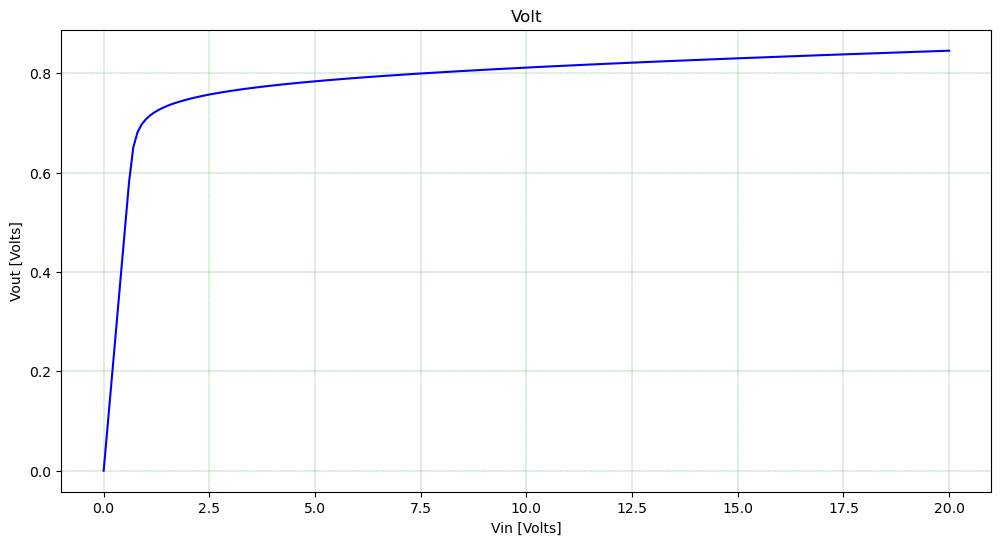

In [33]:
# import utilitare
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
# instanta circuit
circuit1 = Circuit('Stabilizator de tensiune cu dioda Zener')
# model dioda
circuit1.model('BZX384B6V2', 'D', IS = 1.033*10**-15@u_A, RS = 0.452@u_Ohm, BV = 6.2@u_V, IBV = 4.5@u_mA, N = 1.001 )
# netlist
Vi = circuit1.V('i', 1, 0,  0@u_V)
R1 = circuit1.R('1', 1, 2, 300@u_Ohm)
RL = circuit1.R('L', 2, 0, 10@u_kOhm)
D = circuit1.Diode('', 2, 0, model='BZX384B6V2')
# afisare netlist

print(circuit1)

# instanta simulator
simulator1 = circuit1.simulator(temperature = 25, nominal_temperature= 25)

# analiza circuit si salvare rezultate analiza
analysis1 = simulator1.dc(VI = slice(0, 20, 0.1))

# extragere v_I (obiect WaveForm):  
vI_wf = analysis1.nodes['1']

# extragere v_O (obiect WaveForm):
vO_wf = analysis1.nodes['2']

# afisare caracteristica de functionare stabilizator de tensiune:
draw_op_characteristic(vI_wf,vO_wf,'Volt')
# calcul valoare delta_vi (dupa metoda din lab.4, sectiunea 4):
delta_vI = vI_wf.max() - vI_wf.min()

# calcul valoare delta_vo (dupa metoda din lab.4, sectiunea 4):
delta_vO = vO_wf.max() - vO_wf.min()

# calcul Fo:
Fo = abs(delta_vI/delta_vO)
# afisare delta_vI:
print(f'delta_vI = {delta_vI}')
# afisare delta_vO:
print(f'delta_vO = {delta_vO}')
# afisare valoare Fo: 
print(f'Fo = {Fo}')

## 2. Sursa de alimentare

1. să se editeze schema electronica a sursei de tensiune continua, indicata in Figura 2:

<img src = '604.png' width = 700 height = 500>

<p style="text-align: center;">Figura 2. Sursa de tensiune continua </p>

- sursa de tensiune $v_I$, conectata intre nodurile **1** si **0**; reprezinta tensiunea electrica furnizata de priza de alimentare cu energie electrica este o sursa de tensiune sinusoidala, cu parametrii:
    - valoare medie = 0 [Volti]
    - amplitudine = 220 [Volti]
    - frecventa   =  50 [Hertzi]
- transformatorul se va modela prin intermediul unei surse de tensiune, comandata in tensiune (modelul transformatorului este furnizat in cod);
- pentru redresorul de tensiune, se va folosi redresorul de tensiune bialternanta, modelat in laboratorul anterior;
- pentru capacitatea electrica a condensatorului de filtrare, se va utiliza valoarea din laboratorul anterior;
- pentru stabilizatorul de tensiune, se va utiliza stabilizatorul modelat la punctul anterior;
- rezistenta de sarcina $R_L$ are valoarea $1[kOhm]$.

2. sa se simuleze circuitul din Figura 2 la temperatura de lucru de $25^o C$ si la temperatura nominala de $25^o C$; in cadrul simularii, sa se efectueze o analiza in regim tranzitoriu; parametrii analizei sunt:
  - numar perioade semnal vizualizate, *N* = 5
  - numar puncte simulare, *POINTS* = 500
3. pe baza potentialelor electrice din nodurile circuitului, sa se determine urmatoarele tensiuni electrice:
    - tensiunea furnizata de priza de alimentare $v_I$, 
    - tensiunea furnizata de la iesirea transformatorului $v_T$, 
    - tensiunea furnizata de la iesirea redresorului cu filtru capacitiv $v_R$,
    - tensiunea de iesire a sursei de tensiune $v_O$.
4. sa se vizualizeze formele de unda ale tensiunilor $v_I$, $v_T$, $v_R$, respectiv $v_O$; in acest scop, se va apela functia `draw_waveforms()` implementata la inceputul laboratorului (pentru parametrii *title* se vor pastra valorile implicite).

In [2]:
# import utilitare

# instanta circuit
circuit2 = ...

# model dioda redresoare

# model dioda Zener

########## netlist ############################
 
# 1. trasformatorul de tensiune:
# primarul este conectat intre nodurile 1 si 0
# secundarul este conectat intre nodurile 2 si 3
# factorul de transformare
K  = 0.2
# iesire din transformator
vS = circuit.VCVS('SECUNDAR', 2, 3, 1, 0, K)

# 2. redresorul de tensiune

# 3. stabilizatorul de tensiune

# afisare netlist

###############################################

# date analiza: atribuiti valorile corecte parametrilor indicati mai jos:
# acestia sunt utilizati pentru calculul parametrilor analizei in regim tranzitoriu
N      =  ...     
POINTS =  ...   
PERIOD =  ...

# instanta simulator
simulator2 = ...

# analiza circuit si salvare rezultate analiza
analysis2 = ...

# extragere tensiune de intrare vI 
vI_wf = ...

# extragere tensiune de iesire transormator vT
vT_wf = ...

# extragere tensiune de iesire redresor vR 
vR_wf = ...

# extragere tensiune de iesire vO
vO_wf = ...

# afisare forme de unda sursa de tensiune
